<a href="https://colab.research.google.com/github/shyoon-03/SampleRepo/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터 (7).csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916


<ipython-input-10-c4d5935fee28>:68: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


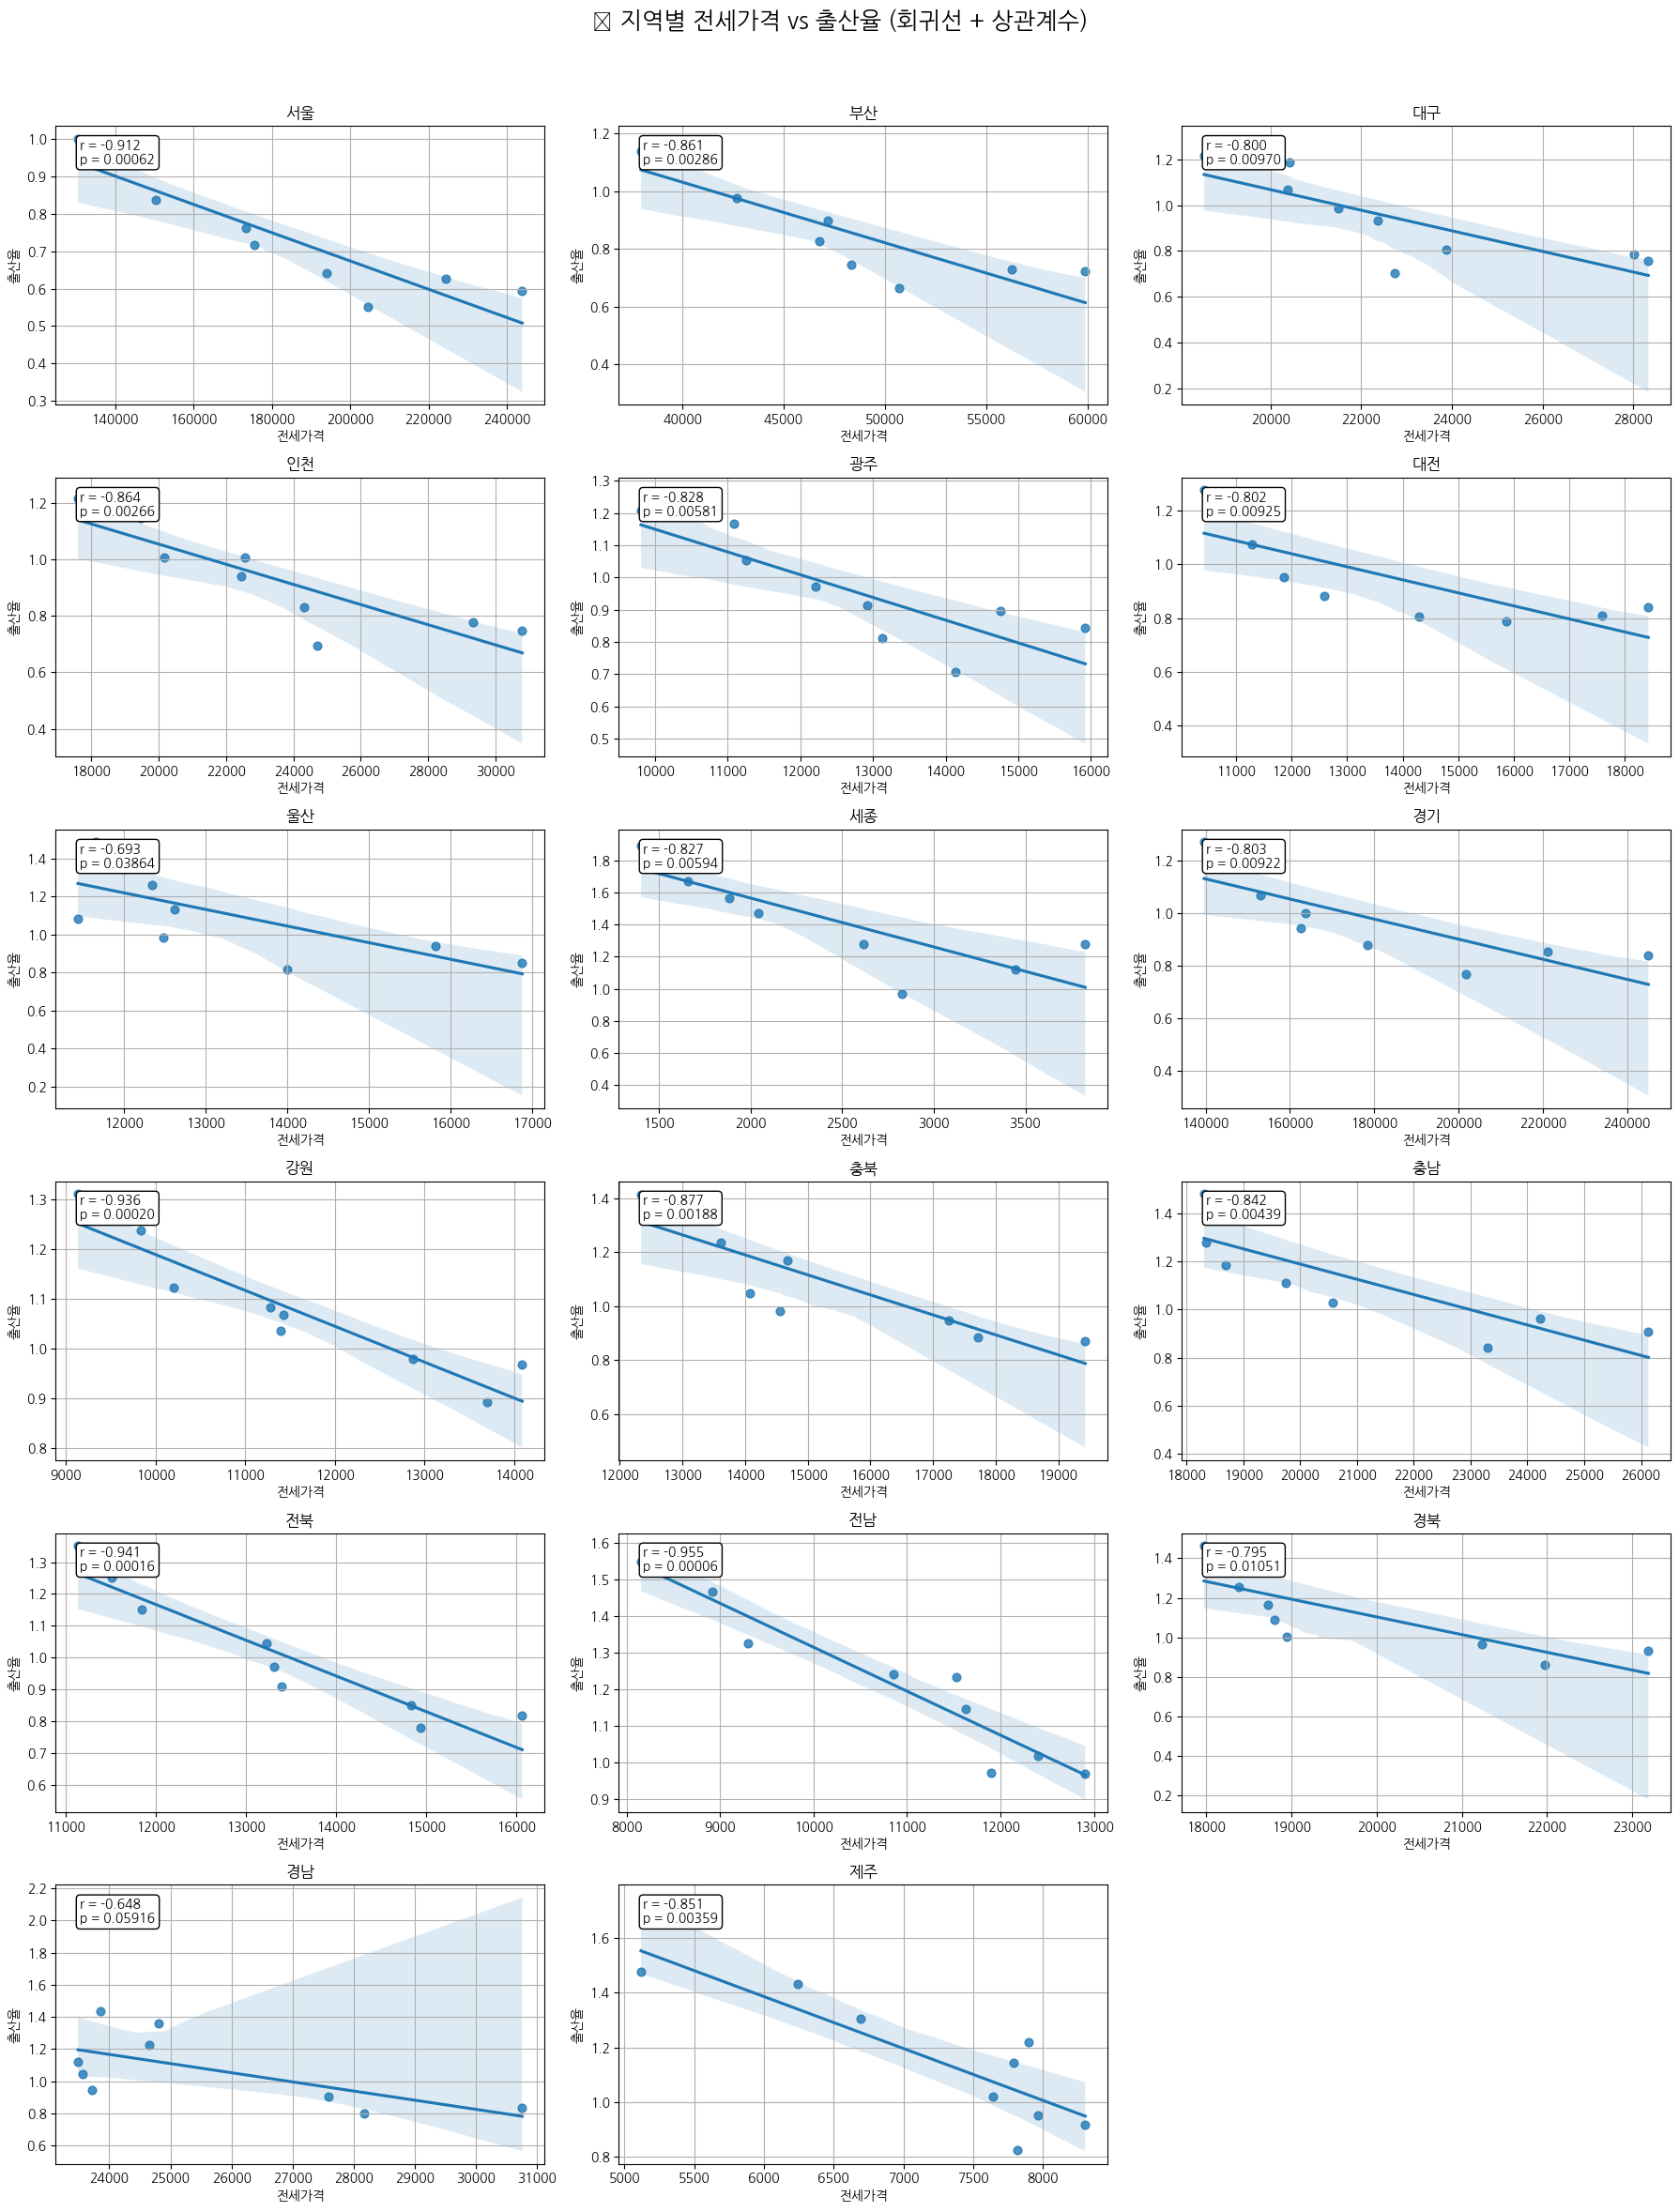

In [10]:
# ✅ STEP 1: 한글 폰트 설치 및 강제 적용
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔고딕 경로 확인 후 직접 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ✅ STEP 2: 분석에 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# ✅ STEP 3: 파일 업로드 및 읽기
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# ✅ STEP 4: 지역별 상관계수 & p-value 계산 함수
def region_correlation(region_df):
    name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {"지역": name, "상관계수": round(corr, 3), "p-value": round(pval, 5)}

correlation_df = pd.DataFrame([
    region_correlation(df[df["지역"] == r])
    for r in df["지역"].unique()
]).sort_values("p-value")

print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

# ✅ STEP 5: 시각화 – 회귀선 포함 산점도 + 상관계수 표시
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)  # 올림 나눗셈

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 + 상관계수)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})
    r, p = pearsonr(subset["전세가격"], subset["출산율"])
    ax.text(0.05, 0.95, f"r = {r:.3f}\np = {p:.5f}",
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", fc="white", ec="black"))
    ax.set_title(region, fontsize=12)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

# 빈 subplot 제거
for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
# 1. Colab에서 엑셀 파일 업로드
from google.colab import files
uploaded = files.upload()

# 2. 데이터 처리 및 통합취업률 계산
import pandas as pd

# 파일 이름 지정 (업로드된 파일 이름 정확히 입력)
file_path = "2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학교별 취업통계.xlsx"

# 엑셀 파일 불러오기 (10행 스킵)
df = pd.read_excel(file_path, sheet_name='학교별 취업통계자료', skiprows=10)

# 필요한 열 추출
df_selected = df[['Unnamed: 1', 'Unnamed: 5', 'Unnamed: 8', '취업자 (명)', '진학자수 (명)']].copy()
df_selected.columns = ['학교명', '지역', '졸업자수', '취업자수', '진학자수']

# '대학교' 포함된 행 필터링
df_selected = df_selected[df_selected['학교명'].str.contains('대학교', na=False)]

# 지역 구분
df_selected['지역구분'] = df_selected['지역'].apply(
    lambda x: '수도권' if str(x).strip() in ['서울', '경기', '인천'] else '비수도권'
)

# 숫자형 변환
df_selected['졸업자수'] = pd.to_numeric(df_selected['졸업자수'], errors='coerce')
df_selected['취업자수'] = pd.to_numeric(df_selected['취업자수'], errors='coerce')
df_selected['진학자수'] = pd.to_numeric(df_selected['진학자수'], errors='coerce')

# 통합 취업률 계산: (취업자수 + 진학자수) / 졸업자수
df_selected['통합취업률'] = ((df_selected['취업자수'] + df_selected['진학자수']) / df_selected['졸업자수']) * 100

# 수도권/비수도권별 대학 수 및 평균 통합 취업률 계산
summary = df_selected.groupby('지역구분').agg(
    대학수=('학교명', 'count'),
    평균_통합취업률=('통합취업률', 'mean')
).reset_index()

# 결과 출력
print(summary)


Saving 2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학교별 취업통계.xlsx to 2015년 고등교육기관 졸업자 건강보험 및 국세DB연계 학교별 취업통계.xlsx
   지역구분  대학수   평균_통합취업률
0  비수도권  130  64.668201
1   수도권   80  62.979709


Saving 시도별_경제활동별_지역내총생산_20250517174316.csv to 시도별_경제활동별_지역내총생산_20250517174316.csv


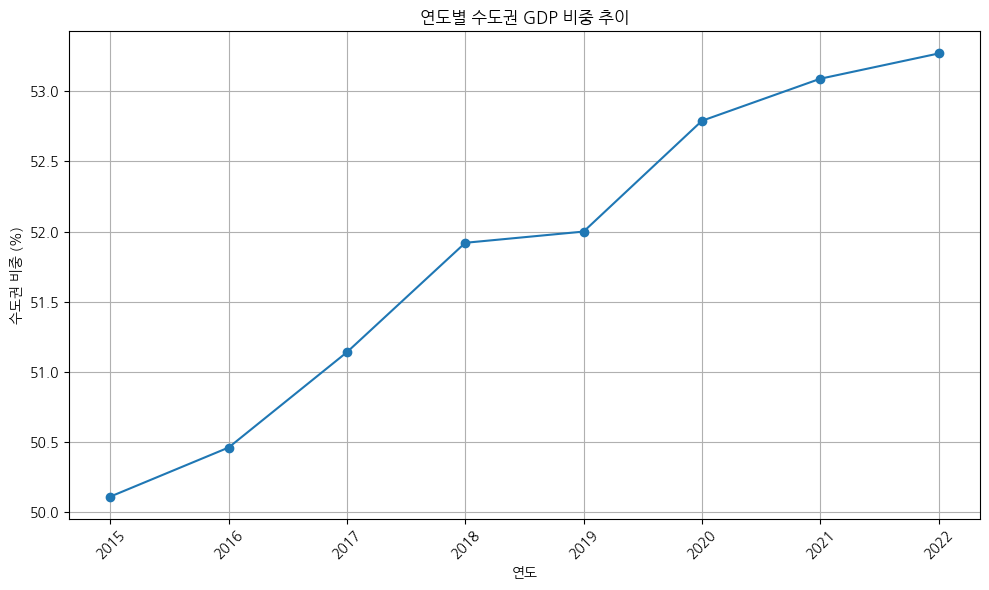

In [19]:
# 1. Colab에서 엑셀 파일 업로드
from google.colab import files
uploaded = files.upload()


# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 2. 데이터 불러오기 (csv 파일 업로드 후 파일명 지정)
file_path = "시도별_경제활동별_지역내총생산_20250517174316.csv"
gdp_df = pd.read_csv(file_path, encoding='cp949')

# 3. 첫 번째 행 제거 및 필터링
gdp_data = gdp_df.drop(index=0)
gdp_filtered = gdp_data[gdp_data['경제활동별'] == '지역내총생산(시장가격)'].copy()

# 4. 연도별 GDP만 추출
year_columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022 p)']
gdp_filtered = gdp_filtered.set_index('시도별')
gdp_filtered = gdp_filtered[year_columns].apply(pd.to_numeric, errors='coerce')

# 5. 수도권과 전국 GDP 계산
capital_gdp = gdp_filtered.loc[['서울특별시', '경기도', '인천광역시']].sum()
total_gdp = gdp_filtered.loc['전국']

# 6. 수도권 비중 계산 (% 단위)
capital_ratio = (capital_gdp / total_gdp * 100).round(2)

# 7. 결과 데이터프레임 만들기
result_df = pd.DataFrame({
    '수도권_GDP(억원)': (capital_gdp / 10000).round(2),
    '전국_GDP(억원)': (total_gdp / 10000).round(2),
    '수도권_비중(%)': capital_ratio
}).T

# 8. 그래프 그리기
years = result_df.columns.str.replace(' p\)', '', regex=True)
plt.figure(figsize=(10, 6))
plt.plot(years, result_df.loc['수도권_비중(%)'], marker='o', linestyle='-')
plt.title('연도별 수도권 GDP 비중 추이')
plt.xlabel('연도')
plt.ylabel('수도권 비중 (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
